In [ ]:
!pip install face-recognition

     |████████████████████████████████| 100.2MB 123kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=75b6c72860f8e728f6a9fd5967b0e178421a1cdd844875feb7c078cf3436bacd
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from skimage.feature import hog
from skimage import data,exposure
from scipy.spatial import distance
import numpy as np
import cv2

#ENTER PATH TO DATA DIRECTORY IN path_to_img (all images should be present in this data directory)
#enter the name of images you want in your database
#ENTER TEST IMAGE NAME IN test_img variable



path_to_img="/content/drive/My Drive/facerecog/data/"
images=['BENZEMA.jpg','VINI.jpg','BALE.jpg']
test_img=['BENZEMA.jpg','test0.jpg','test1.jpg','test2.jpg','test3.jpg','test4.jpg']

Text(0.5, 1.0, 'Histogram of Oriented Gradients')

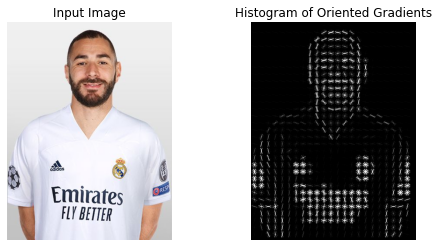

In [ ]:

image = cv2.imread(path_to_img+images[0])
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

fd,hog_image=hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input Image')
hog_image_rescaled=exposure.rescale_intensity(hog_image,in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')


1 face(s) added to db


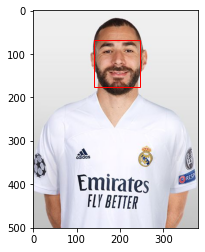

1 face(s) added to db


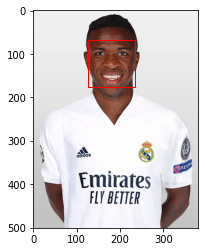

1 face(s) added to db


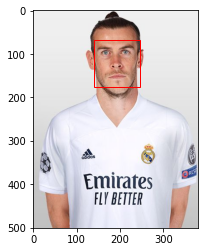

In [ ]:
db=[]
for i in images:
  cntr=1
  image=cv2.imread(path_to_img+i)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  db.append(face_recognition.face_encodings(image)[0])
  face_locations=face_recognition.face_locations(image)
  number_of_faces=len(face_locations)
  print(number_of_faces,'face(s) added to db')
  plt.imshow(image)
  ax=plt.gca()
  for face in face_locations:
    top,right,bottom,left=face
    x,y,w,h=left,top,right,bottom
    rect=Rectangle((x,y),w-x,h-y,fill=False,color='Red')
    ax.add_patch(rect)
  plt.show()

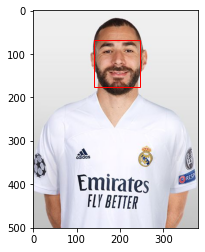

BENZEMA found


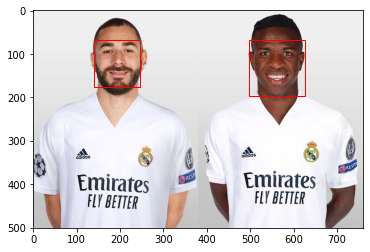

BENZEMA found
VINI found


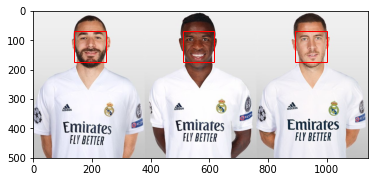

Unknown found
BENZEMA found
VINI found


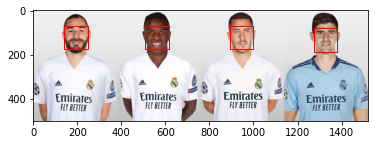

Unknown found
Unknown found
BENZEMA found
VINI found


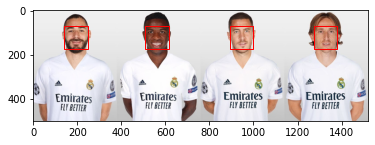

Unknown found
Unknown found
BENZEMA found
VINI found


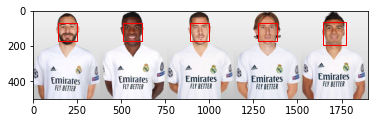

Unknown found
Unknown found
Unknown found
BENZEMA found
VINI found


In [ ]:
for t in test_img:
  image=cv2.imread(path_to_img+t)
  compare_img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.imshow(compare_img)
  ax=plt.gca()
  face_recog=face_recognition.face_locations(compare_img)
  for face in face_recog:
      top,right,bottom,left=face
      x,y,w,h=left,top,right,bottom
      rect=Rectangle((x,y),w-x,h-y,fill=False,color='Red')
      ax.add_patch(rect)
  plt.show()


  unknown_face_encoding=face_recognition.face_encodings(compare_img)
  for test in unknown_face_encoding:
    results=[]
    for face in db:
      d=distance.euclidean(face,test)
      results.append(d)
    threshold=0.6
    results=np.array(results)<=threshold
    name='Unknown'
    if results[0]:
      name='BENZEMA'
    elif results[1]:
      name='VINI'
    elif results[2]:
      name='BALE'
    print(name,'found')
